In [1]:
from genesis.objects.topology.plots.synthetic_discrete_objects import create_figure

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Using numpy.fft fallback


In [2]:
!ls /home/earlcd/Desktop/genesis_tmp/fp_*

/home/earlcd/Desktop/genesis_tmp/fp_scales_reference_ellipsoid_2.0.nc
/home/earlcd/Desktop/genesis_tmp/fp_scales_reference_ellipsoid_4.0.nc
/home/earlcd/Desktop/genesis_tmp/fp_scales_reference_ellipsoid_8.0.nc
/home/earlcd/Desktop/genesis_tmp/fp_scales_reference_spheroid__0.25_9.nc


In [3]:
#!rm /home/earlcd/Desktop/genesis_tmp/fp_scales_reference_*.nc

100%|██████████| 18/18 [00:00<00:00, 37.40it/s]


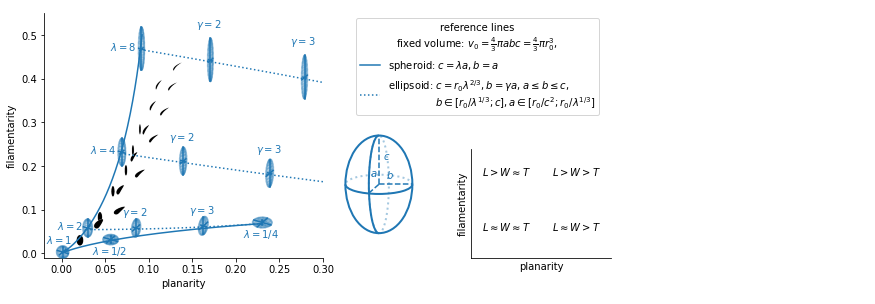

In [4]:
ax, ds, reference_lines = create_figure(reference_shape="ellipsoid",
    temp_files_path="~/Desktop/genesis_tmp", show_progress=True,
    xlim=(-0.02, 0.30), figsize=(5,5)
)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


plt.savefig("fp_numerical_example.pdf", bbox_inches="tight")

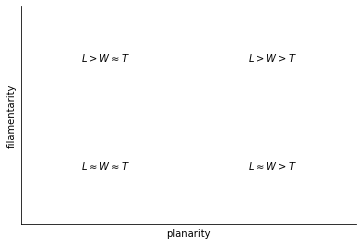

In [5]:
import seaborn as sns
fig, ax = plt.subplots()

def add_text_fp_diagram(ax):

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("planarity")
    ax.set_ylabel("filamentarity")

    ax.text(0.25, 0.25, "$L \\approx W \\approx T$", ha="center")
    ax.text(0.25, 0.75, "$L > W \\approx T$", ha="center")
    ax.text(0.75, 0.75, "$L > W > T$", ha="center")
    ax.text(0.75, 0.25, "$L \\approx W > T$", ha="center")
    ax.set_xticks([])
    ax.set_yticks([])

    sns.despine(ax=ax)
    
add_text_fp_diagram(ax=ax)

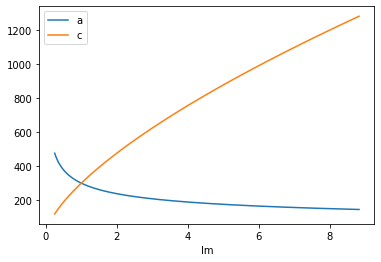

In [6]:
reference_lines['spheroid'].a.swap_dims(dict(i="lm")).plot(label="a")
reference_lines['spheroid'].c.swap_dims(dict(i="lm")).plot(label="c")
plt.gca().set_ylabel("")
plt.legend()

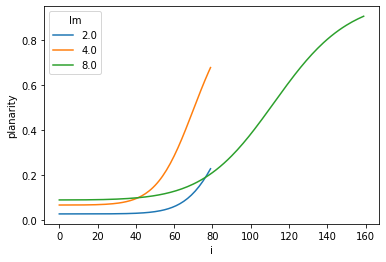

In [7]:
reference_lines['ellipsoid'].planarity.plot(hue="lm")

In [8]:
reference_lines['ellipsoid']

<xarray.Dataset>
Dimensions:        (i: 160, lm: 3)
Coordinates:
  * i              (i) int64 0 1 2 3 4 5 6 7 ... 152 153 154 155 156 157 158 159
  * lm             (lm) float64 2.0 4.0 8.0
Data variables:
    length         (lm, i) float64 328.6 328.6 328.6 328.6 ... 917.5 929.8 942.6
    width          (lm, i) float64 294.9 294.9 294.9 294.9 ... 743.6 754.2 764.8
    thickness      (lm, i) float64 278.6 278.6 278.6 278.6 ... 39.57 38.5 37.46
    v0             (lm, i) float64 1.131e+08 1.131e+08 ... 1.131e+08 1.131e+08
    v1             (lm, i) float64 2.03e+05 2.03e+05 ... 1.469e+06 1.51e+06
    v2             (lm, i) float64 438.2 438.2 438.2 ... 1.24e+03 1.257e+03
    v3             (lm, i) float64 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    a              (lm, i) float64 238.1 238.0 237.9 237.8 ... 19.81 19.28 18.75
    b              (lm, i) float64 238.1 238.2 238.3 ... 1.167e+03 1.2e+03
    c              (lm, i) float64 476.2 476.2 476.2 ... 1.2e+03 1.2e+03 1.2e+03
    f

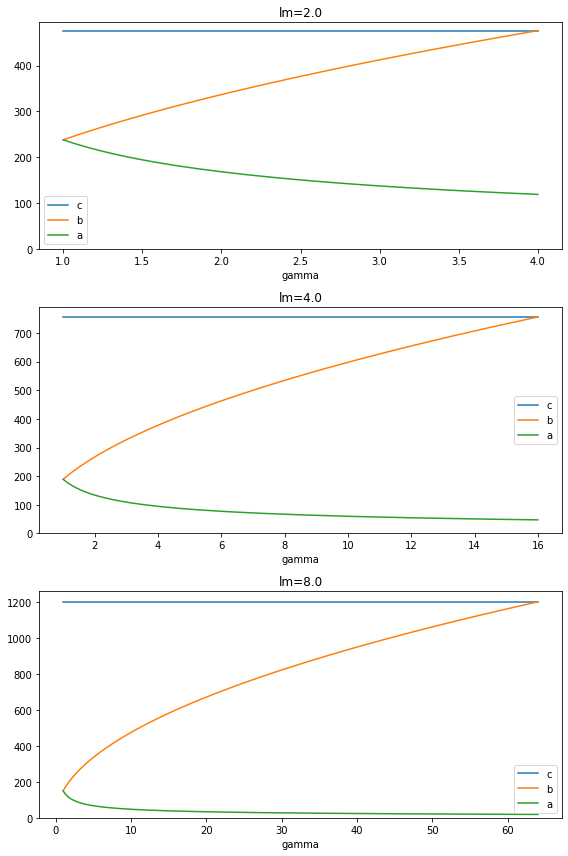

In [9]:
lambdas = reference_lines['ellipsoid'].lm.values

fig, axes = plt.subplots(nrows=len(lambdas), figsize=(8, 12))

for ax, lm in zip(axes, lambdas):
    ds = reference_lines['ellipsoid'].sel(lm=lm)
    for v in "a b c".split(" ")[::-1]:
        ds.swap_dims(dict(i="gamma"))[v].plot(ax=ax, label=v)
    ax.legend()
    ax.set_ylabel("")
    ax.set_title(f"lm={lm}")
    ax.set_ylim(0, None)
    
plt.tight_layout()

In [10]:
reference_lines['spheroid']

<xarray.Dataset>
Dimensions:        (i: 172)
Coordinates:
  * i              (i) int64 133 134 135 136 137 138 ... 299 300 301 302 303 304
    lm             (i) float64 0.25 0.2553 0.2606 0.2661 ... 8.472 8.65 8.833
Data variables:
    length         (i) float64 ...
    width          (i) float64 ...
    thickness      (i) float64 ...
    v0             (i) float64 ...
    v1             (i) float64 ...
    v2             (i) float64 ...
    v3             (i) float64 ...
    a              (i) float64 ...
    c              (i) float64 ...
    filamentarity  (i) float64 0.06787 0.06691 0.06592 ... 0.4867 0.4937 0.5007
    planarity      (i) float64 0.2289 0.2223 0.2157 ... 0.09162 0.09202 0.09241
    shape          object ...
Attributes:
    r0:       300

In [11]:
from genesis.objects.topology.minkowski import analytical as minkowsi_analytical

In [12]:
ds

<xarray.Dataset>
Dimensions:        (i: 160)
Coordinates:
  * i              (i) int64 0 1 2 3 4 5 6 7 ... 152 153 154 155 156 157 158 159
    lm             float64 8.0
Data variables:
    length         (i) float64 626.2 626.2 626.2 626.2 ... 917.5 929.8 942.6
    width          (i) float64 227.4 227.4 227.4 227.4 ... 743.6 754.2 764.8
    thickness      (i) float64 189.6 189.6 189.6 189.6 ... 39.57 38.5 37.46
    v0             (i) float64 1.131e+08 1.131e+08 ... 1.131e+08 1.131e+08
    v1             (i) float64 2.982e+05 2.982e+05 ... 1.469e+06 1.51e+06
    v2             (i) float64 834.9 834.9 834.9 ... 1.24e+03 1.257e+03
    v3             (i) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    a              (i) float64 150.0 149.8 149.5 149.3 ... 19.81 19.28 18.75
    b              (i) float64 150.0 150.2 150.5 ... 1.136e+03 1.167e+03 1.2e+03
    c              (i) float64 1.2e+03 1.2e+03 1.2e+03 ... 1.2e+03 1.2e+03
    filamentarity  (i) float64 0.4672 0.4672 0.4672